## 1. Install and Import Dependencies

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Load Model

In [86]:
import warnings
from yolov5 import detect
warnings.filterwarnings('ignore')
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)
model.conf = 0.05  # default is 0.25

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Saksham Gupta/.cache\torch\hub\master.zip
YOLOv5  2025-5-20 Python-3.12.0 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [78]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections with Images

In [10]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/1200px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg"

In [11]:
results = model(img)
results.print()

image 1/1: 800x1200 1 person, 31 cars, 4 trucks
Speed: 1079.5ms pre-process, 526.3ms inference, 9.3ms NMS per image at shape (1, 3, 448, 640)


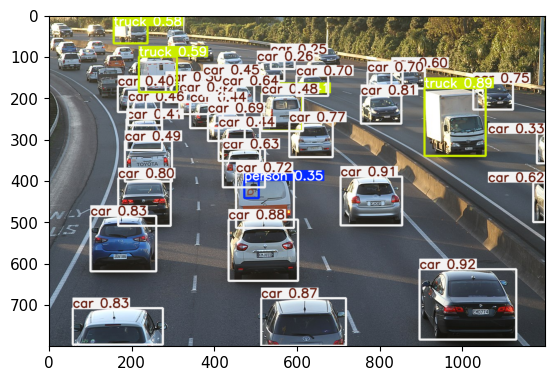

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[253, 216, 161],
         [252, 217, 161],
         [255, 223, 170],
         ...,
         [ 71,  84,  74],
         [ 58,  59,  27],
         [ 84,  79,  37]],
 
        [[241, 204, 149],
         [245, 210, 154],
         [251, 218, 165],
         ...,
         [ 87, 100,  90],
         [ 58,  59,  28],
         [ 79,  74,  32]],
 
        [[244, 207, 152],
         [242, 207, 151],
         [233, 200, 147],
         ...,
         [ 87,  99,  89],
         [ 53,  52,  22],
         [ 78,  70,  31]],
 
        ...,
 
        [[ 64,  73,  82],
         [ 65,  74,  83],
         [ 65,  74,  83],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 46,  51,  55]],
 
        [[ 60,  69,  78],
         [ 64,  73,  82],
         [ 62,  71,  80],
         ...,
         [ 50,  55,  59],
         [ 51,  56,  60],
         [ 48,  53,  57]],
 
        [[ 52,  61,  70],
         [ 75,  84,  93],
         [ 81,  90,  99],
         ...,
         [ 51,  56,  60],
  

## 4. Real Time Detections

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Train from scratch

In [113]:
import uuid   # Unique identifier
import os
import time

In [131]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [19]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [132]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.5d91d4ae-34e8-11f0-83b7-c0353225e01a.jpg


In [133]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.5de32222-34e8-11f0-96c1-c0353225e01a.jpg
data\images\awake.5de32223-34e8-11f0-ac04-c0353225e01a.jpg
data\images\awake.5de32224-34e8-11f0-969c-c0353225e01a.jpg
data\images\awake.5de32225-34e8-11f0-8f58-c0353225e01a.jpg
data\images\awake.5de32226-34e8-11f0-9424-c0353225e01a.jpg
data\images\awake.5de32227-34e8-11f0-a694-c0353225e01a.jpg
data\images\awake.5de32228-34e8-11f0-a554-c0353225e01a.jpg
data\images\awake.5de32229-34e8-11f0-9fa7-c0353225e01a.jpg
data\images\awake.5de3222a-34e8-11f0-8bed-c0353225e01a.jpg
data\images\awake.5de3222b-34e8-11f0-bda2-c0353225e01a.jpg
data\images\awake.5de3222c-34e8-11f0-965f-c0353225e01a.jpg
data\images\awake.5de3222d-34e8-11f0-826e-c0353225e01a.jpg
data\images\awake.5de3222e-34e8-11f0-b8ef-c0353225e01a.jpg
data\images\awake.5de3222f-34e8-11f0-bb9d-c0353225e01a.jpg
data\images\awake.5de32230-34e8-11f0-bc1a-c0353225e01a.jpg
data\images\awake.5de32231-34e8-11f0-ab83-c0353225e01a.jpg
data\images\awake.5de32232-34e8-11f0-8095-c0353225e01a.j

In [1]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [2]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Saksham': No such file or directory
YOLOv5  2025-5-19 Python-3.12.0 torch-2.4.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

## 6. Load Custom Model

In [127]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Saksham Gupta/.cache\torch\hub\master.zip
YOLOv5  2025-5-20 Python-3.12.0 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [128]:
img = os.path.join('data', 'images', 'drowsy.0129f002-34d7-11f0-905b-c0353225e01a.jpg')

image 1/1: 480x640 (no detections)
Speed: 5.5ms pre-process, 505.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


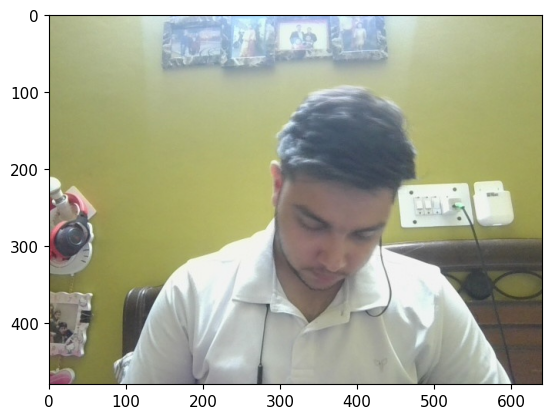

In [129]:
model.conf = 0.08  # Set confidence threshold to 8%
results = model(img)

# Get all predictions
predictions = results.pred[0]  # shape: [num_predictions, 6]

if predictions is not None and len(predictions) > 0:
    # Filter predictions for class 15 (awake) and 16 (drowsy) only
    filtered_preds = predictions[(predictions[:, 5] == 15) | (predictions[:, 5] == 16)]

    if len(filtered_preds) > 0:
        # Get the prediction with the highest confidence
        top_prediction = filtered_preds[torch.argmax(filtered_preds[:, 4])].unsqueeze(0)

        # Keep only the top prediction
        results.pred[0] = top_prediction
    else:
        # No relevant class found
        results.pred[0] = torch.empty((0, 6))

results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [119]:
print(model.names)

{0: 'dog', 1: 'person', 2: 'cat', 3: 'tv', 4: 'car', 5: 'meatballs', 6: 'marinara sauce', 7: 'tomato soup', 8: 'chicken noodle soup', 9: 'french onion soup', 10: 'chicken breast', 11: 'ribs', 12: 'pulled pork', 13: 'hamburger', 14: 'cavity', 15: 'awake', 16: 'drowsy'}


In [120]:
results = model(img)

In [122]:
results = model(img, size=640)

In [123]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 5.7ms pre-process, 647.3ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [124]:
print(results.xyxy[0])

tensor([], size=(0, 6))


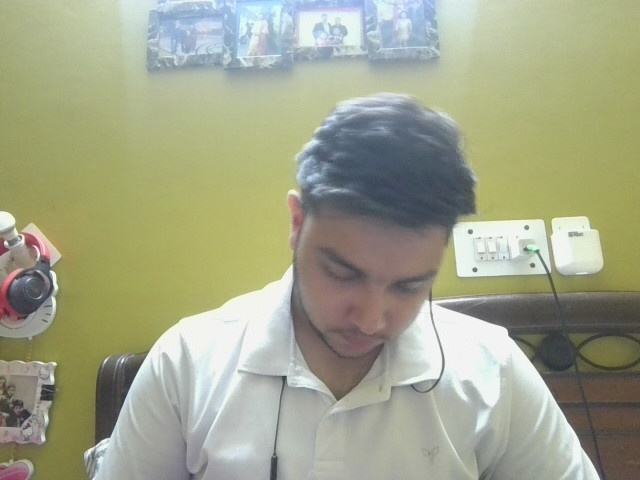

In [125]:
results.show()

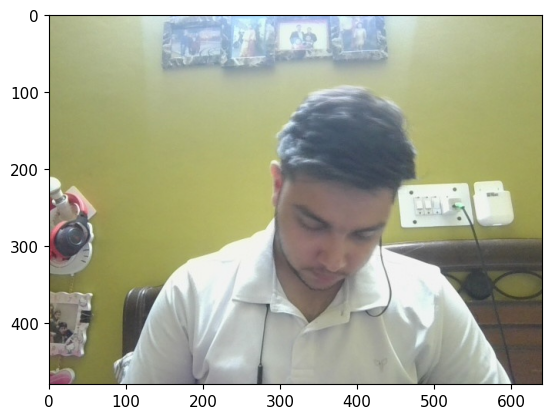

In [126]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [76]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()